### *Adult Income Prediction (Census Data)* ###

- *Understanding the Problem Statement*
- *Data Overview* 
- *Exploratory Data Analysis (EDA)*
- *Data Checks to Perform*
- *Data Preprocessing*
  - *Encoding Target Categorical Features*: Convert the target variable into numerical form.  
  - *Splitting the Data into Train and Test Sets*: Divide the data for training and testing purposes.  
- *Pipeline Implementation*
  - *Model Selection*: Choose a suitable machine learning model for the task.  
  - *Pipeline Approach*: Combine preprocessing and modeling steps into a streamlined process.  
  - *Model Training with Pipeline*: Train the pipeline with the prepared training data.  
- *Evaluate Performance*
  - Assess the model using evaluation metrics.  

##### *1 Understanding the Problem Statement*
- The goal of this project is to predict whether an individual **earns more than 50K USD per year** based on their demographic and employment-related information. This is a **binary classification problem**, where the target variable is income. The dataset contains various features such as age, workclass, education, occupation, hours worked per week, and other demographic attributes that can influence an individual's income.

- The primary objective is to build a model that can accurately predict the **income** category **(<=50K or >50K)** based on the given features, after performing data analysis, cleaning, and necessary preprocessing steps

##### *2 Data Overview*

##### *Data Collection*
- Dataset Source -https://www.kaggle.com/datasets/uciml/adult-census-income 
- The data consists of 15 columns and 32561 rows.

##### *Import Data and Required Packages*

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline 
from category_encoders import TargetEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

##### *Import the CSV Data as Pandas DataFrame*

In [9]:
data = pd.read_csv('D:\\AIP Project\\Dataset\\adult.csv')

##### *Show Top 5 Records*

In [10]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


##### *Shape of the dataset*

In [11]:
data.shape

(32561, 15)

##### *2.2 Dataset Information*

##### *Age Information* 
- age: The age of the individual -> *(Integer)*.

---

##### *Work-related Information* 
- workclass: The type of employment or work sector of the individual (e.g., Private, Self-employed, Government) -> *(Categorical)*.  
- fnlwgt: The final weight assigned to the individual based on the Census -> *(Integer)*.
The final weight (fnlwgt) is a number that tells us how much an individual in the dataset represents in the real population. It's used to make sure the data is more accurate and reflects the true distribution of people.  

---

##### *Education-related Information*  
- education: The highest level of education attained by the individual -> *(Categorical)*.  
- education.num: The numeric representation of the education level -> *(Integer)*.  

---

##### *Marital and Relationship Information*  
- marital.status: The marital status of the individual (e.g., Never-married, Married-civ-spouse) -> *(Categorical)*.  
- relationship: The relationship status with respect to the household (e.g., Husband, Wife, Own-child) -> *(Categorical)*.  

---

##### *Work and Occupation Details*  
- occupation: The type of occupation the individual is engaged in -> *(Categorical)*.  
- hours.per.week: The number of hours worked per week -> *(Integer)*.  

---

##### *Demographic Information* 
- race: The race category of the individual (e.g., White, Black) -> *(Categorical)*.  
- sex: The gender of the individual -> *(Categorical)*.  
- native.country: The native country of the individual -> *(Categorical)*.  

---

##### *Financial Information* 
- capital.gain: The amount of capital gain recorded for the individual -> *(Integer)*.  
- capital.loss: The amount of capital loss recorded for the individual -> *(Integer)*.  

---

##### *Target Variable* 
- income: The income category of the individual (<=50K or >50K) -> *(Categorical)*.


##### *3 Exploratory Data Analysis (EDA)* 

##### *Visualization*

- **Distribution of Numerical Features**

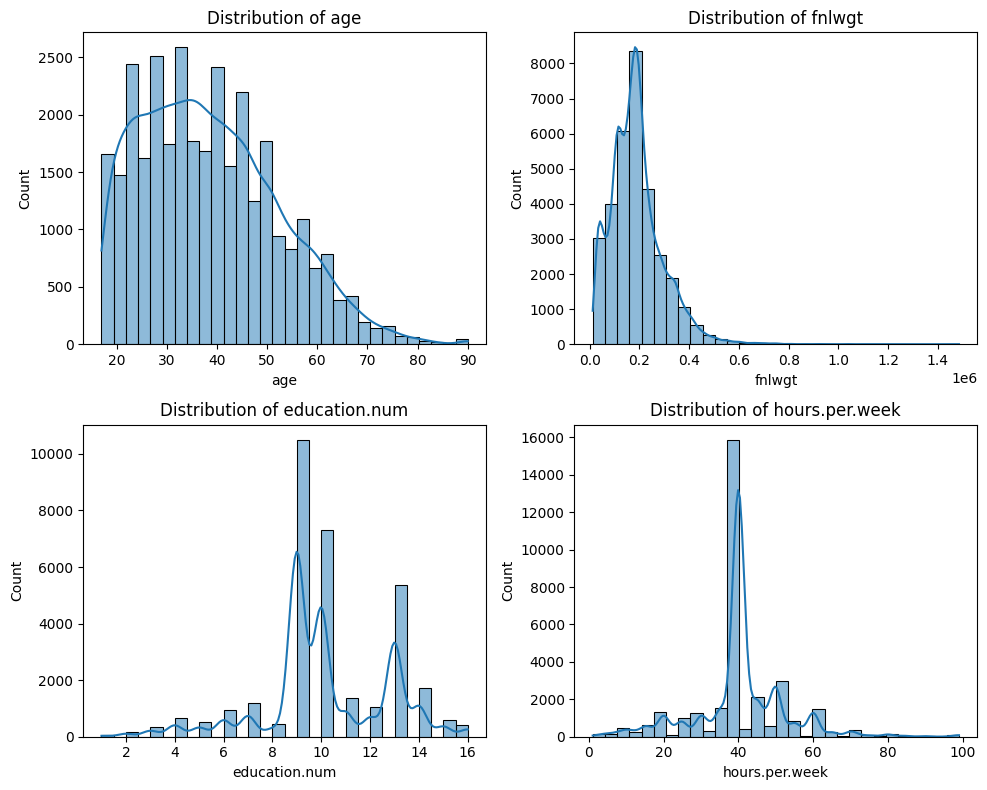

In [12]:
# Plotting histograms for numerical features
numerical_columns = ['age', 'fnlwgt', 'education.num', 'hours.per.week']  # Replace with your numerical columns

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate line
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

This helps us understand the distribution of numerical features and identify any skewness or outliers

- **Target Variable Distribution**

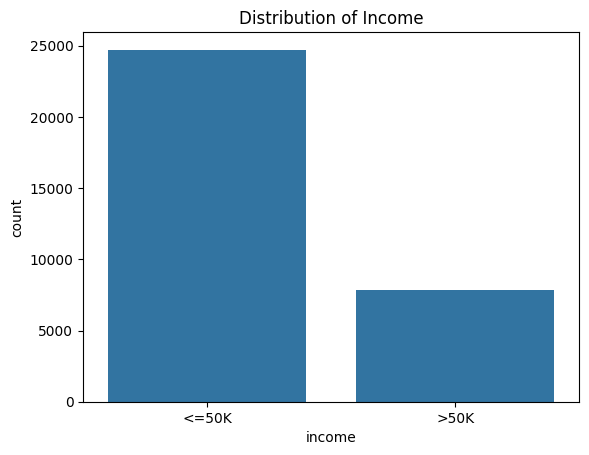

In [13]:
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.show()

The target variable (income) is imbalanced, with a higher number of instances of <=50K compared to >50K. To address this imbalance, we will apply techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic data points for the minority class, ensuring a more balanced dataset for model training

- **Gender Distribution by Income Level**

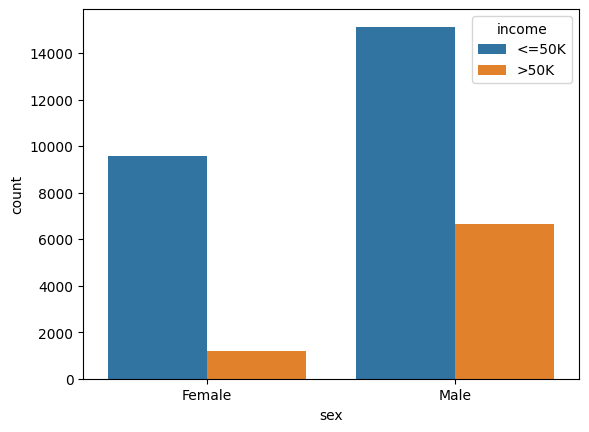

In [14]:
# Use countplot for categorical variables
sns.countplot(x='sex', hue='income', data=data)

# Display the plot
plt.show()

The countplot shows that males significantly outnumber females in both income categories. However, a larger proportion of individuals earning <=50K are observed for both genders, with the imbalance more prominent among females.

- **Age Distribution by Income Categories**

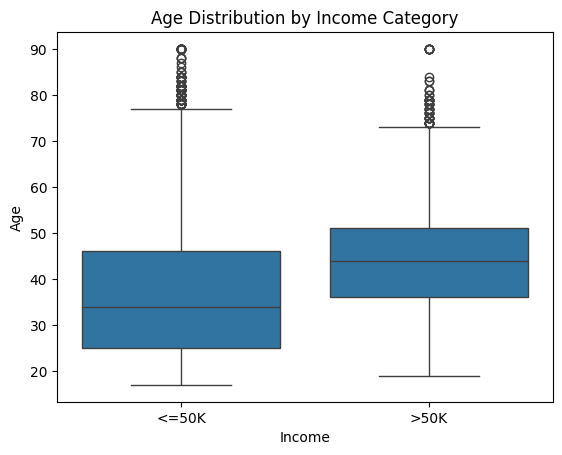

In [16]:
sns.boxplot(x='income', y='age', data=data)
plt.title("Age Distribution by Income Category")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

The box plot shows the age distribution for each income category, with the median age for <=50K falling between 30 and 40, while for >50K, it falls between 40 and 50. The age range spans from 20 to 80 for both categories, highlighting potential outliers at the extremes

##### *4 Data Checks to Perform*

##### *Check Missing values*
- Identify columns with missing values.
- Replace placeholder values like '?' with np.nan.
- Impute missing values for categorical and numerical columns.

**Identify columns with missing values**

In [18]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [19]:
a=data.drop(columns=['fnlwgt','age','education.num','hours.per.week','capital.loss','capital.gain'])

In [20]:
for column in a:
    unique_categories = a[column].unique()
    unique_categories_str = [str(item) for item in unique_categories]  # Convert all items to strings
    print('\nThe categories in {}: {}'.format(column, ', '.join(unique_categories_str)))


The categories in workclass: ?, Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked

The categories in education: HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool

The categories in marital.status: Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse

The categories in occupation: ?, Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv

The categories in relationship: Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife

The categories in race: White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo

The categories in sex: Female, Male

The categories in native.country: United-States, ?, Mexico, Greece, Vi

**Replace placeholder values like '?' with np.nan.**

In [21]:
data[data == '?'] = np.nan

**Impute missing values for categorical columns.**

Handle Missing Values: Replaced missing values (NaN) in columns workclass, occupation, and native.country with their respective mode values to maintain data consistency.

In [22]:
# Handle missing values for the input_data
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native.country'] = data['native.country'].fillna(data['native.country'].mode()[0])

In [24]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


##### *Check Data Types*

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### *Check statistics of data set*

In [27]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#####  *Check for Duplicate Rows*

Remove Duplicates: Checked for and dropped duplicate rows to ensure data quality.
Encode the Target Feature: Converted the income column values (<=50K and >50K) to binary values (0 and 1) for compatibility with machine learning algorithms.

In [28]:
data.duplicated().sum()

np.int64(24)

In [29]:
data.shape

(32561, 15)

In [30]:
data= data.drop_duplicates()
data.shape

(32537, 15)

In [31]:
data.duplicated().sum()

np.int64(0)

##### *5 Data Preprocessing*
- **Encode the Target Feature**: Converted the income column values (<=50K and >50K) to binary values (0 and 1) for compatibility with machine learning algorithms.

- **Splitting Data into Training and Test Sets**: Split the data into training and testing sets to evaluate model performance, ensuring that the model is trained on a portion of the data and tested on another to assess its ability to generalize to unseen data.

In [45]:
categorical_columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
numerical_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [46]:
data.income.value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

**Replace the categorical values in the income column**

In [47]:
data['income'] = data['income'].replace({'<=50K':0, '>50K':1})
data.income.value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

**Splitting Data into Training and Test Sets**

In [48]:
X = data.drop('income', axis = 1)
y = data['income']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

##### *6 Pipeline Implementation*

- **Model Selection**: Choose an appropriate machine learning model to train on the preprocessed data.

- **Pipeline Approach**: Use a pipeline to integrate all preprocessing and modeling steps, ensuring consistency and efficiency during training and testing.

- **Model Training with Pipeline**: Train the pipeline with the prepared training data.

##### *Model selection*
In this project, Logistic Regression was selected due to its effectiveness in binary classification tasks, where the target variable is categorical with two classes   (<=50K and >50K).

##### *Create pipeline*

- **Encoding Categorical Features**: Encode categorical variables using target encoding to convert them into numerical representations based on their relationship with the target variable.

- **Handling Imbalanced Data**: Address class imbalance in the target variable using SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

- **Scaling**: Standardize numerical features within the pipeline to ensure they have a mean of 0 and a standard deviation of 1.

- **Logistic Regression**: Utilize Logistic Regression with optimized parameters to classify the target variable.

In [50]:
pipeline = ImbPipeline([
    ('encoder', ce.TargetEncoder(cols=categorical_columns)), # Target encoding
    ('smote', SMOTE(random_state=1)),  # Handle class imbalance
    ('scaler', StandardScaler()),  # Scale numerical features
    ('model', LogisticRegression(C=0.5, max_iter=500))  # Logistic Regression
])

##### *Fitting and training*

In [52]:
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('encoder',
                 TargetEncoder(cols=['workclass', 'education', 'marital.status',
                                     'occupation', 'relationship', 'race',
                                     'sex', 'native.country'])),
                ('smote', SMOTE(random_state=1)), ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.5, max_iter=500))])

In [53]:
# Predictions
y_pred = pipeline.predict(X_test)

In [55]:
# After loading the pipeline, inspect the steps
print(pipeline.named_steps)

{'encoder': TargetEncoder(cols=['workclass', 'education', 'marital.status', 'occupation',
                    'relationship', 'race', 'sex', 'native.country']), 'smote': SMOTE(random_state=1), 'scaler': StandardScaler(), 'model': LogisticRegression(C=0.5, max_iter=500)}


##### *7 Evaluate performance*

- **Model Evaluation**: Evaluate the pipeline's performance on the test dataset using metrics such as 
   -  accuracy
   -  confusion matrix.
   -  classification report

**Accuracy**

In [54]:
print(accuracy_score(y_test, y_pred))

0.8027043638598648


**confusion_matrix**

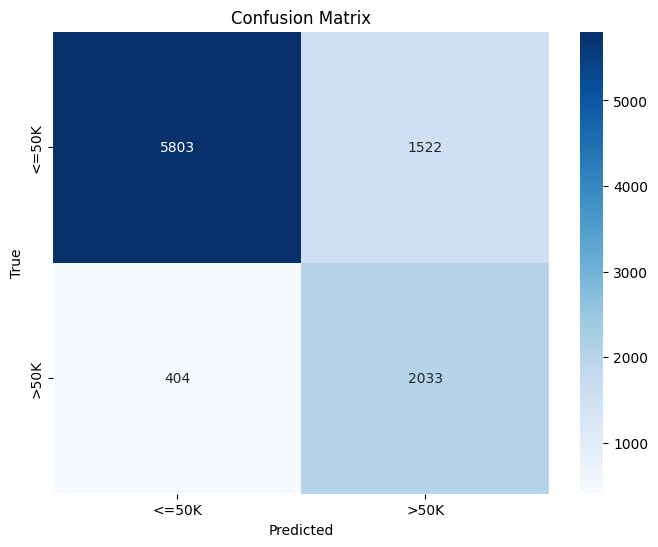

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Classification report**

In [40]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7325
           1       0.57      0.83      0.68      2437

    accuracy                           0.80      9762
   macro avg       0.75      0.81      0.77      9762
weighted avg       0.84      0.80      0.81      9762



##### *8 Project Wrap-Up*

In this project, we explored and processed demographic data to predict income levels (<=50K or >50K). After handling missing values, visualizing key features, and balancing the dataset, we trained a Logistic Regression model. This process demonstrated how feature analysis and preprocessing contribute to building a successful predictive model. The results highlighted key trends, such as the impact of age and sex on income classification, leading to a robust model.

##### *9 Save the model*

Save the Model: Serialize the trained pipeline using joblib for reuse and deployment.

In [91]:
# Save the pipeline to a .pkl file
import joblib

joblib.dump(pipeline, "logistic_pipeline.pkl")
print("Pipeline saved as logistic_pipeline.pkl")

Pipeline saved as logistic_pipeline.pkl
